In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
np.random.seed(123)
n_karyawan = 500

# 1. GENERATE DATA DASAR
data = {
    'ID': range(1001, 1001 + n_karyawan),
    'Satisfaction': np.random.uniform(0, 1, n_karyawan), # 0.0 - 1.0
    'Evaluation': np.random.uniform(0.4, 1, n_karyawan),
    'Project_Count': np.random.randint(2, 7, n_karyawan),
    'Department': np.random.choice(['Sales', 'IT', 'HR', 'Support', 'Technical'], n_karyawan),
    'Salary': np.random.choice(['low', 'medium', 'high'], n_karyawan),
    'Resign': np.zeros(n_karyawan) # Target (0=Stay, 1=Resign)
}

df_raw = pd.DataFrame(data)

# 2. MENGOTORI DATA (Tantangan Kamu Ada Di Sini!)

# A. Missing Values (Data Hilang)
df_raw.loc[10:30, 'Satisfaction'] = np.nan  # Kepuasan kosong
df_raw.loc[50:55, 'Department'] = np.nan    # Departemen kosong

# B. Inconsistent Data (Typo / Huruf Besar Kecil)
# HR ditulis 'hr', IT ditulis 'it ' (ada spasi)
df_raw['Department'] = df_raw['Department'].replace({'HR': 'hr', 'IT': 'it '})

# C. Outlier (Data Ekstrim/Mustahil)
df_raw.loc[5, 'Satisfaction'] = 10.0 # Kepuasan 1000% (Padahal maks 1.0)
df_raw.loc[100, 'Project_Count'] = 50 # Mengerjakan 50 proyek sendirian (Mustahil)

# D. Pola Target (Logika Bisnis)
# Orang yang kepuasannya rendah ATAU kerjanya terlalu berat (proyek > 6) bakal Resign
mask_resign = (df_raw['Satisfaction'] < 0.4) | (df_raw['Project_Count'] > 5)
df_raw.loc[mask_resign, 'Resign'] = 1

print("Data Mentah HRD Siap! (Perhatikan betapa kotornya dia)")
print(df_raw.info())
display(df_raw.head(10))

Data Mentah HRD Siap! (Perhatikan betapa kotornya dia)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   Satisfaction   479 non-null    float64
 2   Evaluation     500 non-null    float64
 3   Project_Count  500 non-null    int64  
 4   Department     494 non-null    object 
 5   Salary         500 non-null    object 
 6   Resign         500 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 27.5+ KB
None


,ID,Satisfaction,Evaluation,Project_Count,Department,Salary,Resign
0,1001,0.696469,0.527699,5,Technical,high,0.0
1,1002,0.286139,0.635382,5,it,high,1.0
2,1003,0.226851,0.910929,5,Support,medium,1.0
3,1004,0.551315,0.476567,3,it,high,0.0
4,1005,0.719469,0.936319,3,hr,medium,0.0
5,1006,10.000000,0.697905,5,hr,medium,0.0
6,1007,0.980764,0.655657,2,Support,high,0.0
7,1008,0.684830,0.583388,2,hr,low,0.0
8,1009,0.480932,0.950109,3,Support,low,0.0
9,1010,0.392118,0.710574,6,Support,high,1.0


In [432]:
df_raw

,ID,Satisfaction,Evaluation,Project_Count,Department,Salary,Resign
0,1001,0.696469,0.527699,5,Technical,high,0.0
1,1002,0.286139,0.635382,5,it,high,1.0
2,1003,0.226851,0.910929,5,Support,medium,1.0
3,1004,0.551315,0.476567,3,it,high,0.0
4,1005,0.719469,0.936319,3,hr,medium,0.0
...,...,...,...,...,...,...,...
495,1496,0.980597,0.558638,2,Technical,medium,0.0
496,1497,0.882713,0.814549,2,Sales,low,0.0
497,1498,0.919472,0.608288,5,it,low,0.0
498,1499,0.415504,0.402501,4,Support,high,0.0


In [433]:
df_raw['Department'].value_counts()

Department
hr           109
Sales        101
Support      101
it            94
Technical     89
Name: count, dtype: int64

In [434]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             500 non-null    int64  
 1   Satisfaction   479 non-null    float64
 2   Evaluation     500 non-null    float64
 3   Project_Count  500 non-null    int64  
 4   Department     494 non-null    object 
 5   Salary         500 non-null    object 
 6   Resign         500 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 27.5+ KB


In [435]:
df_raw.describe()

,ID,Satisfaction,Evaluation,Project_Count,Resign
count,500.000000,479.000000,500.000000,500.00000,500.000000
mean,1250.500000,0.516067,0.702585,4.14600,0.506000
std,144.481833,0.521271,0.170432,2.46187,0.500465
min,1001.000000,0.000082,0.401255,2.00000,0.000000
25%,1125.750000,0.257445,0.560356,3.00000,0.000000
50%,1250.500000,0.481026,0.699204,4.00000,1.000000
75%,1375.250000,0.743239,0.847261,5.00000,1.000000
max,1500.000000,10.000000,0.997517,50.00000,1.000000


In [436]:
df_raw['Satisfaction'] = df_raw['Satisfaction'].fillna(df_raw['Satisfaction'].mean())

In [437]:
df_raw.isnull().sum()

ID               0
Satisfaction     0
Evaluation       0
Project_Count    0
Department       6
Salary           0
Resign           0
dtype: int64

In [438]:
numeric = df_raw.select_dtypes('number').columns
numeric

Index(['ID', 'Satisfaction', 'Evaluation', 'Project_Count', 'Resign'], dtype='object')

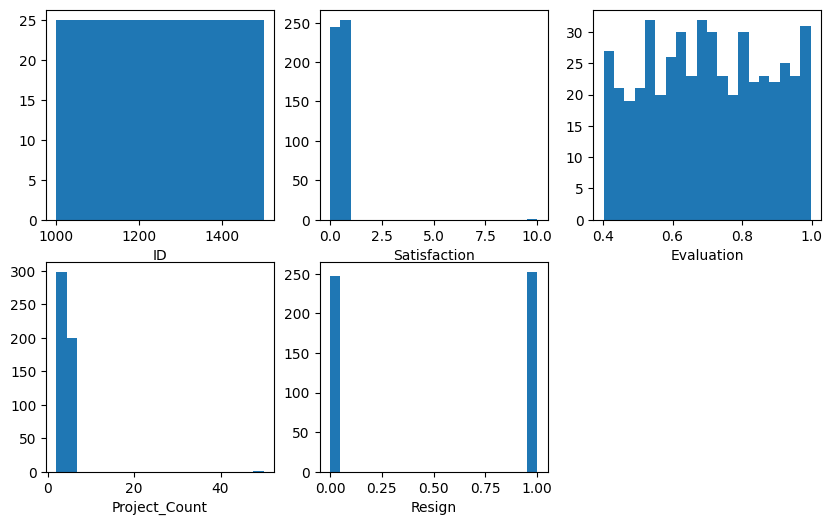

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_raw[column], bins=20)
    plt.xlabel(column)

/tmp/ipykernel_10844/4111771568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_raw[column], palette='Set2')
/tmp/ipykernel_10844/4111771568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_raw[column], palette='Set2')
/tmp/ipykernel_10844/4111771568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_raw[column], palette='Set2')
/tmp/ipykernel_10844/4111771568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

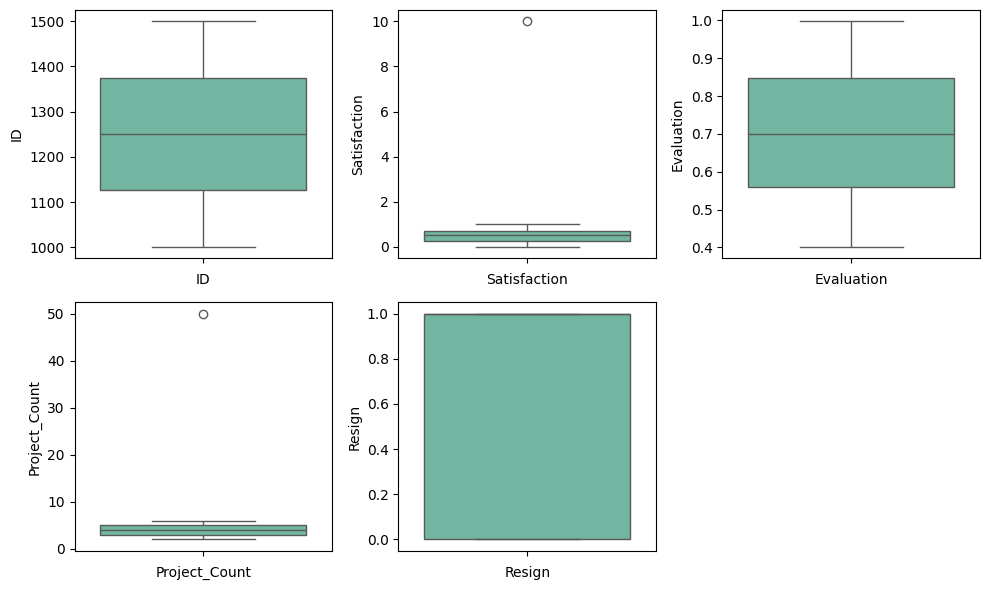

In [440]:

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df_raw[column], palette='Set2')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [441]:
df_raw[df_raw['Satisfaction'] > 2]

,ID,Satisfaction,Evaluation,Project_Count,Department,Salary,Resign
5,1006,10.0,0.697905,5,hr,medium,0.0


In [442]:
df_raw[df_raw['Project_Count'] > 10]

,ID,Satisfaction,Evaluation,Project_Count,Department,Salary,Resign
100,1101,0.513128,0.820816,50,hr,medium,1.0


In [443]:
q1 = df_raw[numeric].quantile(0.25)
q3 = df_raw[numeric].quantile(0.75)
iqr = q3 - q1

lower = q1- 1.5 * iqr
upper = q3 + 1.5 * iqr
condition = ~((df_raw[numeric]< lower ) | (df_raw[numeric] > upper)).any(axis=1)
numerical_features = df_raw.loc[condition, numeric]

numerical_features

,ID,Satisfaction,Evaluation,Project_Count,Resign
0,1001,0.696469,0.527699,5,0.0
1,1002,0.286139,0.635382,5,1.0
2,1003,0.226851,0.910929,5,1.0
3,1004,0.551315,0.476567,3,0.0
4,1005,0.719469,0.936319,3,0.0
...,...,...,...,...,...
495,1496,0.980597,0.558638,2,0.0
496,1497,0.882713,0.814549,2,0.0
497,1498,0.919472,0.608288,5,0.0
498,1499,0.415504,0.402501,4,0.0


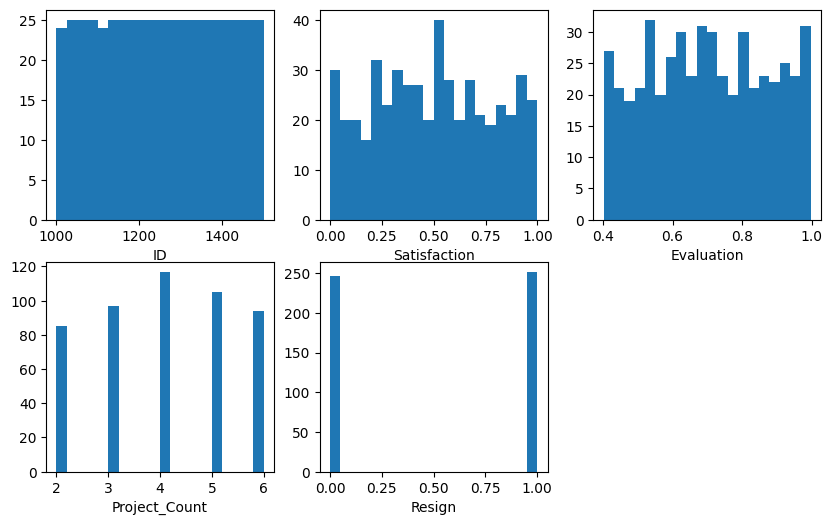

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    plt.hist(numerical_features[column], bins=20)
    plt.xlabel(column)

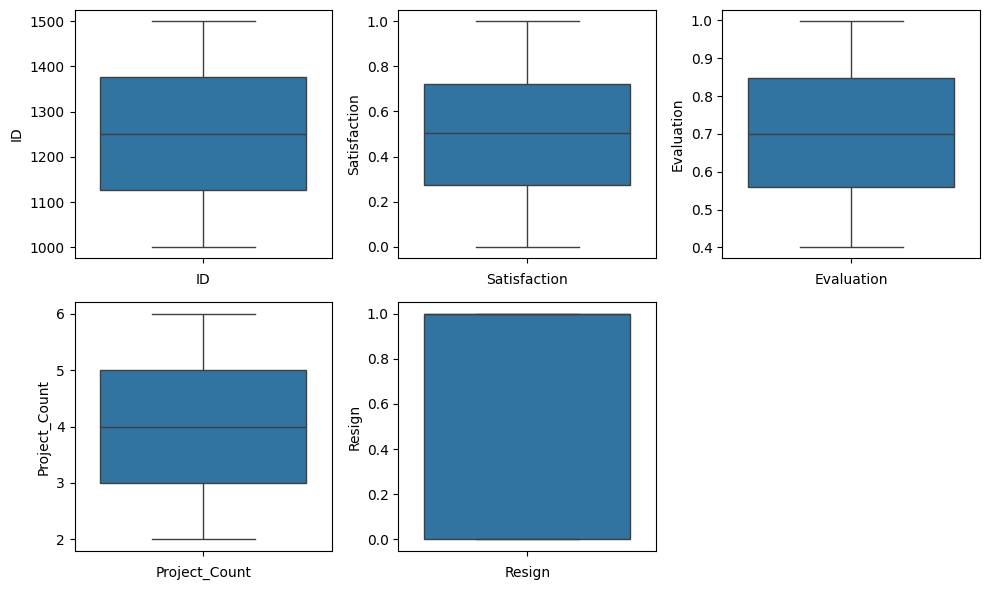

In [445]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(numerical_features[column])
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [446]:
df_raw['Salary'] = df_raw['Salary'].str.capitalize()

In [447]:
df_raw

,ID,Satisfaction,Evaluation,Project_Count,Department,Salary,Resign
0,1001,0.696469,0.527699,5,Technical,High,0.0
1,1002,0.286139,0.635382,5,it,High,1.0
2,1003,0.226851,0.910929,5,Support,Medium,1.0
3,1004,0.551315,0.476567,3,it,High,0.0
4,1005,0.719469,0.936319,3,hr,Medium,0.0
...,...,...,...,...,...,...,...
495,1496,0.980597,0.558638,2,Technical,Medium,0.0
496,1497,0.882713,0.814549,2,Sales,Low,0.0
497,1498,0.919472,0.608288,5,it,Low,0.0
498,1499,0.415504,0.402501,4,Support,High,0.0


In [448]:
categorical = df_raw.select_dtypes('object')

In [449]:
categorical['Salary'] = categorical['Salary'].str.strip().str.capitalize()
categorical['Department'] = categorical['Department'].str.strip().str.capitalize()

In [450]:
categorical

,Department,Salary
0,Technical,High
1,It,High
2,Support,Medium
3,It,High
4,Hr,Medium
...,...,...
495,Technical,Medium
496,Sales,Low
497,It,Low
498,Support,High


In [451]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
categorical['Salary'] = oe.fit_transform(categorical[['Salary']])

In [452]:
categorical['Department'].value_counts()

Department
Hr           109
Sales        101
Support      101
It            94
Technical     89
Name: count, dtype: int64

In [453]:
categorical.value_counts()

Department  Salary
Hr          0.0       39
            2.0       38
Sales       0.0       37
Support     2.0       36
It          0.0       34
Technical   1.0       34
Sales       1.0       33
Support     1.0       33
            0.0       32
Hr          1.0       32
It          2.0       31
Technical   0.0       31
Sales       2.0       31
It          1.0       29
Technical   2.0       24
Name: count, dtype: int64

In [454]:
categorical = pd.get_dummies(categorical, columns=['Department'], prefix='dept', dtype=int)

In [455]:
categorical

,Salary,dept_Hr,dept_It,dept_Sales,dept_Support,dept_Technical
0,2.0,0,0,0,0,1
1,2.0,0,1,0,0,0
2,1.0,0,0,0,1,0
3,2.0,0,1,0,0,0
4,1.0,1,0,0,0,0
...,...,...,...,...,...,...
495,1.0,0,0,0,0,1
496,0.0,0,0,1,0,0
497,0.0,0,1,0,0,0
498,2.0,0,0,0,1,0


In [456]:
df = pd.merge(numerical_features, categorical, left_index=True, right_index = True, how='left')
df

,ID,Satisfaction,Evaluation,Project_Count,Resign,Salary,dept_Hr,dept_It,dept_Sales,dept_Support,dept_Technical
0,1001,0.696469,0.527699,5,0.0,2.0,0,0,0,0,1
1,1002,0.286139,0.635382,5,1.0,2.0,0,1,0,0,0
2,1003,0.226851,0.910929,5,1.0,1.0,0,0,0,1,0
3,1004,0.551315,0.476567,3,0.0,2.0,0,1,0,0,0
4,1005,0.719469,0.936319,3,0.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,1496,0.980597,0.558638,2,0.0,1.0,0,0,0,0,1
496,1497,0.882713,0.814549,2,0.0,0.0,0,0,1,0,0
497,1498,0.919472,0.608288,5,0.0,0.0,0,1,0,0,0
498,1499,0.415504,0.402501,4,0.0,2.0,0,0,0,1,0


NameError: name 'columns' is not defined

In [479]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['ID', 'Resign'])
y = df['Resign']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)

prediksi = model.predict(x_test_scaled)

akurasi = accuracy_score(prediksi, y_test)
print(f"\n🎯 Akurasi Model Prediksi Resign: {akurasi * 100:.2f}%")


🎯 Akurasi Model Prediksi Resign: 85.00%


In [486]:
prediksi[3]

np.float64(1.0)

In [480]:
x.columns.tolist()

['Satisfaction',
 'Evaluation',
 'Project_Count',
 'Salary',
 'dept_Hr',
 'dept_It',
 'dept_Sales',
 'dept_Support',
 'dept_Technical']

In [482]:
import pandas as pd
import numpy as np

# 1. Kita buat data Mas Budi secara manual
# Urutan HARUS SAMA dengan X.columns kamu:
# ['Satisfaction', 'Evaluation', 'Project_Count', 'Salary', 'dept_HR', 'dept_IT', 'dept_Sales', 'dept_Support', 'dept_Technical']

data_budi = {
    'Satisfaction': [0.3],    # Rendah
    'Evaluation': [0.8],      # Bagus
    'Project_Count': [6],     # Kebanyakan proyek
    'Salary': [0],            # Low (Sudah di-map jadi 0)
    'dept_Hr': [0],           # Bukan HR
    'dept_It': [1],           # YA, dia anak IT
    'dept_Sales': [0],        # Bukan Sales
    'dept_Support': [0],      # Bukan Support
    'dept_Technical': [0]     # Bukan Technical
}

# Ubah jadi DataFrame
df_budi = pd.DataFrame(data_budi)

print("Data Mas Budi:")
display(df_budi)

# 2. SCALING (PENTING!)
# Pakai scaler yang SUDAH DILATIH tadi. Jangan buat scaler baru!
budi_scaled = scaler.transform(df_budi)

# 3. PREDIKSI
hasil_prediksi = model.predict(budi_scaled)

# Terjemahkan hasil (0 atau 1)
status = "STAY (Setia)" if hasil_prediksi[0] == 0 else "RESIGN (Bahaya!)"

print(f"\n🤖 Prediksi Model untuk Mas Budi: **{status}**")

Data Mas Budi:


,Satisfaction,Evaluation,Project_Count,Salary,dept_Hr,dept_It,dept_Sales,dept_Support,dept_Technical
0,0.3,0.8,6,0,0,1,0,0,0



🤖 Prediksi Model untuk Mas Budi: **STAY (Setia)**
